In [1]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mat4py import loadmat

In [2]:
import scipy.io as sio

def wfft_hz(filename, Hz_Lthr, Hz_Hthr):
    '"Lthr: lower threshold; Hthr: high threshold"'
    data = loadmat(filename)
    fft_data = fft(data['data'])
    NFFT = math.floor(len(data['data'])/2)+1
    fft_data = abs(fft_data[1:NFFT])
    f = data['Fs']/2 * np.linspace(0, 1, NFFT)
    idx = [i for i, e in enumerate(f) if e>= Hz_Lthr and e <= Hz_Hthr ] 
    X=f[idx]
    y=fft_data[idx]
    return X, y

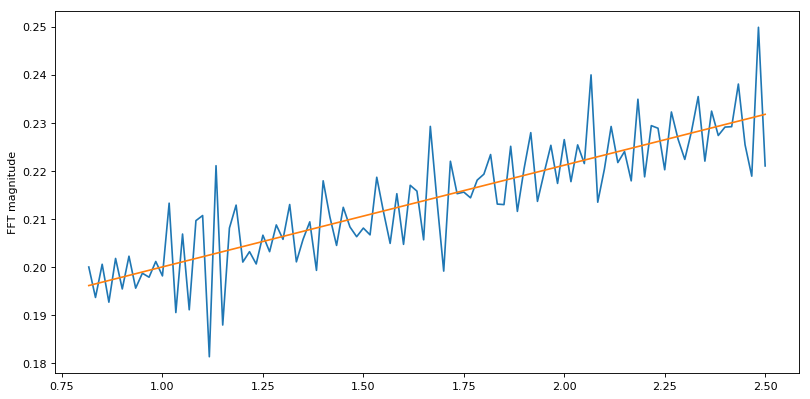

In [3]:
Hz_Lthr, Hz_Hthr =0.8, 2.5 
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_avg.mat'
[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, y)
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b)
plt.ylabel('FFT magnitude')
plt.show()

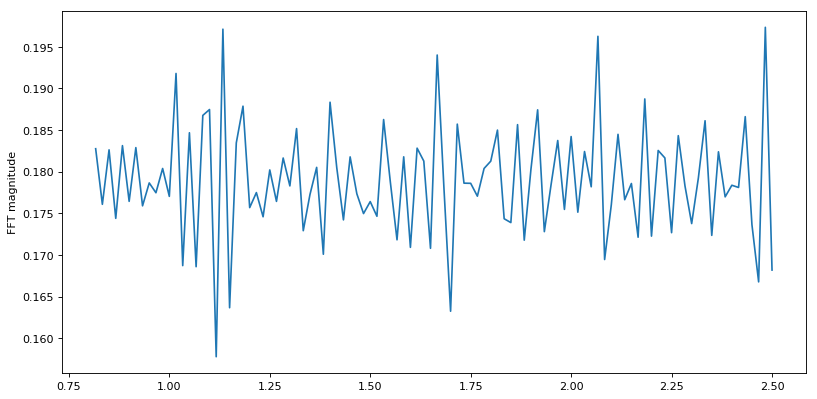

In [4]:
#remove trends from data
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_avg.mat'
[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)

Y = [ round(item, 6) for elem in y for item in elem ]
plt.figure(figsize=(12, 6), dpi=80)
m, b = np.polyfit(X, y, 1)
Y = Y-(m*X)
plt.plot(X, Y)
plt.ylabel('FFT magnitude')
#plt.text(6, 0.3, "Min:"+str(min(y))+"  Max:"+str(max(y))  ,fontsize=16, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [5]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(Y, height=0)
len(peaks)

40

In [6]:
peaks

array([  2,   4,   6,   8,  10,  12,  14,  17,  19,  22,  24,  26,  28,
        30,  33,  35,  38,  41,  43,  46,  48,  51,  54,  60,  63,  66,
        69,  71,  73,  75,  78,  80,  82,  84,  87,  91,  93,  95,  97,
       100])

In [7]:
from scipy.signal import chirp, find_peaks, peak_widths

results_full = peak_widths(Y, peaks, rel_height=1.0)
results_full[0]

array([ 1.7952411 ,  3.82787909,  1.92283655,  1.42884883,  3.58683563,
        9.75398441,  1.99187171,  2.63580797, 34.86109086, 13.67551315,
        1.62136069,  1.6715322 ,  1.64307635,  5.8635584 ,  2.72903115,
       15.96097499,  4.94268035,  1.81567031,  7.65599217,  1.91674331,
        2.98890386, 32.971828  , 10.62024165,  3.74550658,  1.84776357,
        2.87979487,  2.52395385,  4.58391025,  1.58114194, 45.8431197 ,
        4.59233273,  1.3018021 , 22.60918928,  2.95971695,  2.90604207,
        8.99095741,  1.53919442,  1.19033491, 15.20034843,  1.95358528])

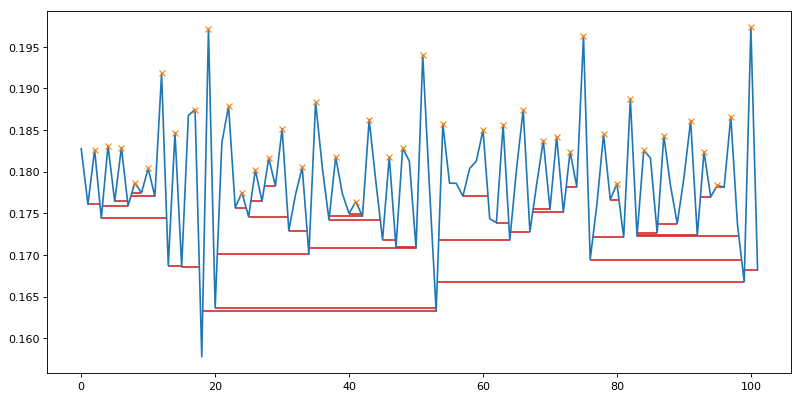

In [8]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)


plt.plot(peaks, Y[peaks], "x")
#plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
#plt.plot(73, results_full[0][29], marker='o', color='r')
plt.show()

In [9]:
Y[peaks]

array([0.18262584, 0.18313197, 0.1828931 , 0.17864923, 0.18038536,
       0.1918045 , 0.18468063, 0.18747032, 0.19712945, 0.18787415,
       0.17748928, 0.18021141, 0.18164254, 0.18518067, 0.18051937,
       0.1883495 , 0.1817772 , 0.17640489, 0.18626603, 0.18178772,
       0.18282785, 0.19402155, 0.18571725, 0.18499964, 0.18565434,
       0.18743403, 0.18374673, 0.18422286, 0.18242299, 0.19627112,
       0.18448982, 0.17857995, 0.18874408, 0.18254921, 0.18433091,
       0.18612317, 0.1823913 , 0.17837043, 0.18661356, 0.19735326])

In [10]:
import heapq
number_of_elements = 10
top_ten_peaks = heapq.nlargest(number_of_elements, Y[peaks])
top_ten_peaks

[0.19735325937565623,
 0.19712945394325251,
 0.19627112189651927,
 0.1940215499165478,
 0.19180449544909417,
 0.18874408039067764,
 0.18834950192990016,
 0.18787415044074895,
 0.18747032294492155,
 0.18743403240402998]

In [11]:
top_ten_peaks_index = [index[0] for index in [np.where(Y == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()
top_ten_peaks_index

[12, 17, 19, 22, 35, 51, 66, 75, 82, 100]

In [12]:
results_full = peak_widths(Y, top_ten_peaks_index, rel_height=1.0)
results_full[0]

array([ 9.75398441,  2.63580797, 34.86109086, 13.67551315, 15.96097499,
       32.971828  ,  2.87979487, 45.8431197 , 22.60918928,  1.95358528])

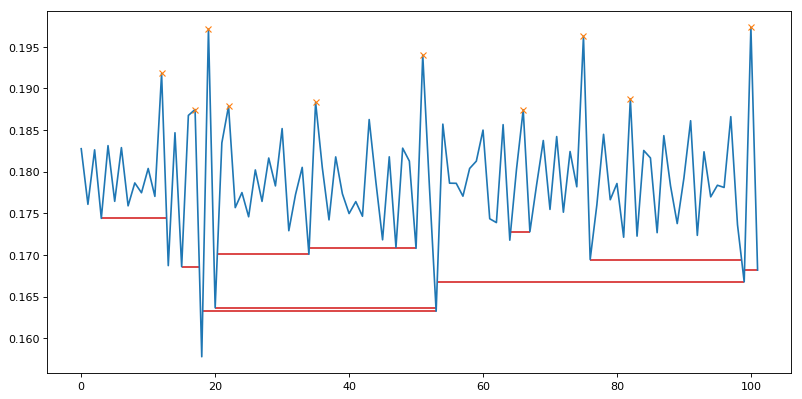

In [13]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_ten_peaks_index, Y[top_ten_peaks_index], "x")
plt.hlines(*results_full[1:], color="C3")
plt.show()

In [14]:
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

top_10_peaks = merge(top_ten_peaks_index,list(results_full[0]))
top_10_peaks

[(12, 9.7539844059081),
 (17, 2.635807968335179),
 (19, 34.86109086037773),
 (22, 13.675513149037286),
 (35, 15.960974992171295),
 (51, 32.97182799686459),
 (66, 2.879794870765352),
 (75, 45.84311969735273),
 (82, 22.609189278311376),
 (100, 1.9535852807280065)]

In [15]:
# sort the elements with peak width
sorted_top_10_peaks = sorted(top_10_peaks, key=lambda peak: peak[1], reverse=True) 
sorted_top_10_peaks

[(75, 45.84311969735273),
 (19, 34.86109086037773),
 (51, 32.97182799686459),
 (82, 22.609189278311376),
 (35, 15.960974992171295),
 (22, 13.675513149037286),
 (12, 9.7539844059081),
 (66, 2.879794870765352),
 (17, 2.635807968335179),
 (100, 1.9535852807280065)]

In [16]:
# find heart beat from peak
t= [X[peak[0]]*60 for peak in sorted_top_10_peaks]
t

[124.00000000000001, 68.0, 100.0, 131.0, 84.0, 71.0, 61.0, 115.0, 66.0, 149.0]

In [18]:
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_avg.mat'
[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)
# remove the trend
m, b = np.polyfit(X, y, 1)
Y = Y-(m*X)
peaks, _ = find_peaks(Y, height=0)
results_full = peak_widths(Y, peaks, rel_height=1.0)
top_ten_peaks = heapq.nlargest(number_of_elements, Y[peaks])

top_ten_peaks_index = [index[0] for index in [np.where(Y == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()
top_10_peaks = merge(top_ten_peaks_index,list(results_full[0]))
sorted_top_10_peaks = sorted(top_10_peaks, key=lambda peak: peak[1], reverse=True) 
sorted_top_10_peaks

[(100, 13.65089506536384),
 (75, 9.76909911593066),
 (19, 3.812293243888153),
 (66, 3.5408728256132864),
 (91, 2.638981634159137),
 (82, 1.9963019009829122),
 (35, 1.9327066862084417),
 (97, 1.8487362917424264),
 (12, 1.8030657386215756),
 (51, 1.4105391292552492)]

In [19]:
t= [X[peak[0]]*60 for peak in sorted_top_10_peaks]
t

[149.0,
 124.00000000000001,
 68.0,
 115.0,
 140.0,
 131.0,
 84.0,
 146.0,
 61.0,
 100.0]